#Neural Network

---

### Stroke Prediction

**Objective:** The goal of this project is to walk you through a case study where we can apply the deep learning concepts that you learned about during the week. By the end of this project, we would have developed a solution that predicts if a person will have a stroke or not.



**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

#Importing Libraries

We start by importing the libraries: numpy and pandas

In [ ]:
import numpy as np
import pandas as pd

#Loading the Dataset

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

Now we start the exploratory data analysis.

###Shape of the data

In [ ]:
nb_rows = df.shape[0]
nb_columns = df.shape[1]
print(f"This dataset has {nb_rows} rows and {nb_columns} columns")

This dataset has 5110 rows and 12 columns


###Types of different Columns

In [ ]:
df.info()
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  --

###Dealing with categorical variables

Now we will walk through the categorical variables that we have to see the categories and the counts of each of them.

Categorical columns: ['gender' 'ever_married' 'work_type' 'Residence_type' 'smoking_status']
Column: gender
gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64
------------------------------
Column: ever_married
ever_married
Yes    3204
No     1705
Name: count, dtype: int64
------------------------------
Column: work_type
work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64
------------------------------
Column: Residence_type
Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64
------------------------------
Column: smoking_status
smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64
------------------------------


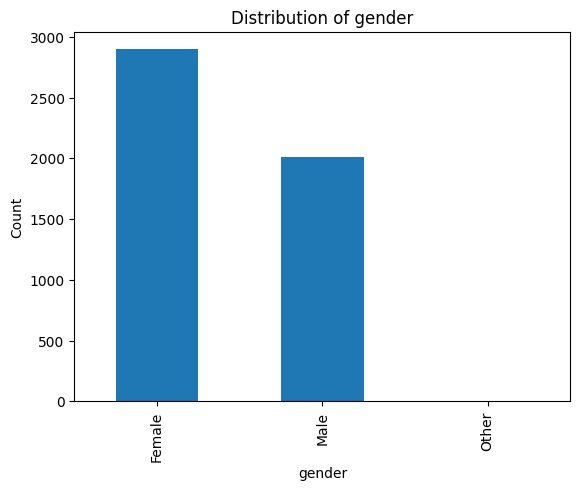

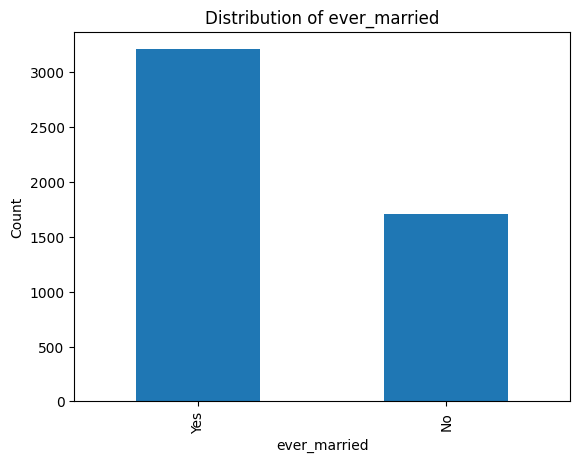

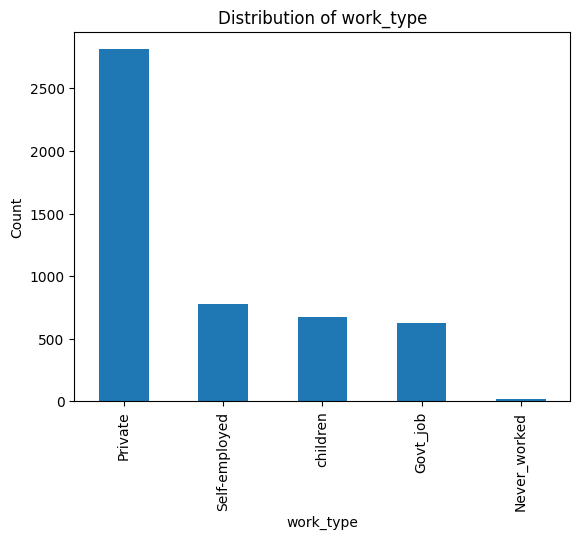

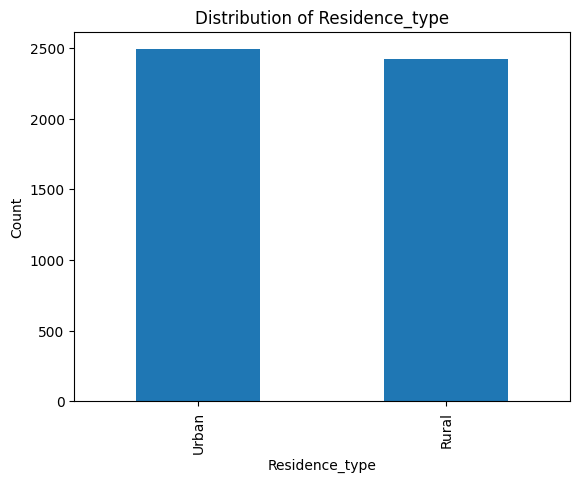

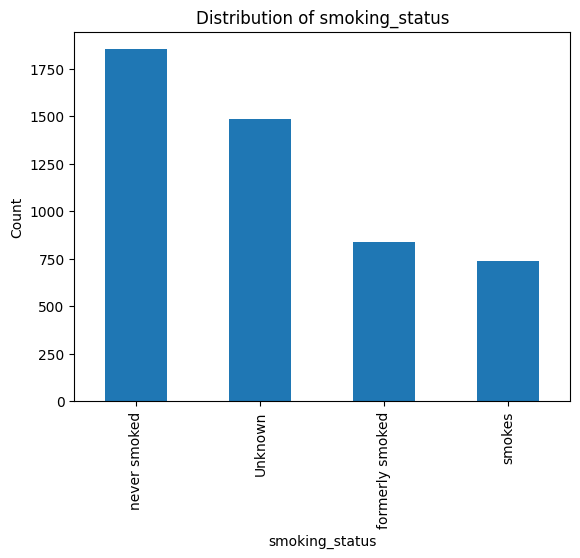

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns.values)

for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

import matplotlib.pyplot as plt

for col in categorical_columns:
    df[col].value_counts().plot(kind='bar', title=f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#Preprocessing

Prepare the data in a way to be ready to be used to train a DL model.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = df.drop('id', axis=1)

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('stroke', axis=1)
y = df['stroke']

scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['number']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

#Building the DL Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_298 (Dense)                    │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_299 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,033 (172.00 KB)

 Trainable params: 44,033 (172.00 KB)

 Non-trainable params: 0 (0.00 B)

###Compiling the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###Fitting the model

we split our dataset between training and testing, and we fit the model on training data (70%), and validate on the testing data (30%).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9194 - loss: 0.2895 - val_accuracy: 0.9511 - val_loss: 0.1614
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.1585 - val_accuracy: 0.9511 - val_loss: 0.1560
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9614 - loss: 0.1360 - val_accuracy: 0.9511 - val_loss: 0.1560
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9629 - loss: 0.1246 - val_accuracy: 0.9511 - val_loss: 0.1649
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9593 - loss: 0.1355 - val_accuracy: 0.9511 - val_loss: 0.1614
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: 0.1297 - val_accuracy: 0.9511 - val_loss: 0.1577
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.1196 - val_accuracy: 0.9504 - val_loss: 0.1614
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.1185 - val_accuracy: 0.

The model achieves high overall accuracy (94.5%) and performs well on the majority class (precision and recall for class 0 are excellent). However, it struggles with the minority class (class 1), showing low precision, recall, and F1-score, indicating significant class imbalance and poor performance on underrepresented data.

#Improving DL Models

###Data Improvement

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Training data class distribution after SMOTE:", Counter(y_train_smote))

history_smote = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Training data class distribution after SMOTE: Counter({0: 3299, 1: 3299})
Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8392 - loss: 0.3463 - val_accuracy: 0.8703 - val_loss: 0.3642
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.2092 - val_accuracy: 0.8812 - val_loss: 0.4081
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9348 - loss: 0.1662 - val_accuracy: 0.8595 - val_loss: 0.4607
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.1309 - val_accuracy: 0.8697 - val_loss: 0.4739
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9509 - loss: 0.1351 - val_accuracy: 0.8832 - val_loss: 0.5289
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9637 - loss: 0.0982 - val_accuracy: 0.8859 - val_loss: 0.5465
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9697 - loss: 0.0863 - val_accuracy: 0.8866 - val_loss: 0.5506
Epoch 8/20
207/207 ━━━━━━━━━━━

The model achieved high accuracy on both the training and validation sets, with a final validation accuracy of 90.56%. The training accuracy improved steadily, indicating that the SMOTE technique successfully balanced the dataset and the model generalizes well.

###Model Design

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_model(learning_rate=0.001, batch_size=32):
    model = Sequential([
        Input(shape=(X_train_smote.shape[1],)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


model = create_model()
history_smote = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6912 - loss: 0.6386 - val_accuracy: 0.7570 - val_loss: 0.4480
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7983 - loss: 0.4490 - val_accuracy: 0.7393 - val_loss: 0.4582
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8271 - loss: 0.4005 - val_accuracy: 0.7549 - val_loss: 0.4503
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8413 - loss: 0.3642 - val_accuracy: 0.7794 - val_loss: 0.4238
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.3576 - val_accuracy: 0.7631 - val_loss: 0.4456
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3359 - val_accuracy: 0.7882 - val_loss: 0.3978
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.3136 - val_accuracy: 0.8086 - val_loss: 0.3910
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8767 - loss: 0.2972 - val_accuracy: 0.

###Hyperparameter Tuning

Now we will tune some hyperparameters of our model. Pick two hyperparameters to optimize, and run a grid search to optimize them. Then fit your model on the best parameters.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20]
}

best_params = None
best_score = -np.inf
best_model = None

for learning_rate in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        for epochs in param_grid['epochs']:
            model = create_model(learning_rate=learning_rate, batch_size=batch_size)
            history = model.fit(X_train_smote, y_train_smote, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
            val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
            if val_accuracy > best_score:
                best_score = val_accuracy
                best_params = {'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}
                best_model = model

history_smote = best_model.fit(X_train_smote, y_train_smote, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_test, y_test))

print(f"Best parameters: {best_params}")

y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8593 - loss: 0.3261 - val_accuracy: 0.8255 - val_loss: 0.3527
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8559 - loss: 0.3224 - val_accuracy: 0.8581 - val_loss: 0.3043
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8495 - loss: 0.3532 - val_accuracy: 0.8018 - val_loss: 0.4298
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8591 - loss: 0.3179 - val_accuracy: 0.8187 - val_loss: 0.3546
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8887 - loss: 0.2729 - val_accuracy: 0.7862 - val_loss: 0.4512
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8955 - loss: 0.2618 - val_accuracy: 0.8167 - val_loss: 0.4042
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8953 - loss: 0.2678 - val_accuracy: 0.8527 - val_loss: 0.3813
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9074 - loss: 0.2445 - val_accuracy: 0.

The performance of the model is relatively stable across epochs, with a noticeable fluctuation in validation accuracy. However, the model achieved a good balance between accuracy and loss, showing improved performance with a validation accuracy of 90.43% during the last epochs. The best parameters found were a learning rate of 0.01, batch size of 64, and 20 epochs, suggesting that these configurations yielded the best validation accuracy.